In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

In [300]:
animes = pd.read_csv('/Users/angelabi/SAAS RP/Anime csvs/animes.csv')
animes = animes.drop(labels=['synopsis','genre','episodes','members','img_url','link'], axis=1)
# dropped columns I wasn't interested in
animes = animes.dropna(axis=0, how="any", thresh=None, subset=['score','popularity','ranked'], inplace=False)
# dropped rows with nan values in score, popularity, ranked; 18732 rows -> 16099 rows
# 85.9% of original list of anime remains
animes = animes.drop_duplicates(subset=['uid'])
# 16099 -> 14553 rows
animes

,uid,title,aired,popularity,ranked,score
0,28891,Haikyuu!! Second Season,"Oct 4, 2015 to Mar 27, 2016",141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,"Oct 10, 2014 to Mar 20, 2015",28,24.0,8.83
2,34599,Made in Abyss,"Jul 7, 2017 to Sep 29, 2017",98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"Jan 6, 2017",502,22.0,8.83
...,...,...,...,...,...,...
19002,10075,Naruto x UT,"Jan 1, 2011",2382,1728.0,7.50
19003,35828,Miira no Kaikata,"Jan 12, 2018 to Mar 30, 2018",1648,1727.0,7.50
19004,10378,Shinryaku!? Ika Musume,"Sep 27, 2011 to Dec 25, 2011",1547,1548.0,7.56
19005,33082,Kingsglaive: Final Fantasy XV,"Jul 9, 2016",2154,1544.0,7.56


In [301]:
profiles = pd.read_csv('/Users/angelabi/SAAS RP/Anime csvs/profiles.csv')
profiles = profiles.drop(labels=['gender','birthday','link'], axis=1)
# dropped columns I wasn't interested in
profiles = profiles.dropna(axis=0, how="any", inplace=False)
# dropped rows with nan values in any column
# 100% of rows remain
profiles = profiles.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# dropped unecessarily repeated profiles
# 81727 -> 47902 rows, 58.6% of rows remain
profiles = profiles[profiles.favorites_anime != '[]']
# dropped rows with value '[]' in the column favorites_anime, meaning that they had no favorites
# 47902 -> 37478 rows, 78.23% of rows (previous rows, not original set) remain
profiles

,profile,favorites_anime
0,DesolatePsyche,"['33352', '25013', '5530', '33674', '1482', '2..."
1,baekbeans,"['11061', '31964', '853', '20583', '918', '925..."
2,skrn,"['918', '2904', '11741', '17074', '23273', '32..."
3,edgewalker00,"['5680', '849', '2904', '3588', '37349']"
4,aManOfCulture99,"['4181', '7791', '9617', '5680', '2167', '4382..."
...,...,...
77646,WeissYuki,"['36563', '237', '23273', '32979', '23283', '1..."
77651,Akuteru,"['6624', '20785', '17265', '28121']"
77652,Razielek,"['47', '523', '820', '30', '339']"
77654,Mattierial,"['10087', '21327', '585', '28851', '32281', '4..."


In [466]:
reviews = pd.read_csv('/Users/angelabi/SAAS RP/Anime csvs/reviews.csv')
reviews = reviews.drop(labels=['uid','text','link','scores'], axis=1)
# dropped columns I wasn't interested in
# dropped scores because contains scores for overall, story, animation, etc. which is too complicated for now.
reviews = reviews.dropna(axis=0, how="any", inplace=False)
# dropped rows with nan values in any column; 192112 rows -> 192112 rows
# 100% of rows remain
reviews = reviews.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# dropped unecessarily repeated reviews
# 192112 -> 130519 rows, 67.9% of rows remain
reviews

,profile,anime_uid,score
0,DesolatePsyche,34096,8
1,baekbeans,34599,10
2,skrn,28891,7
3,edgewalker00,2904,9
4,aManOfCulture99,4181,10
...,...,...,...
182629,iHitokage,2593,10
182631,Onegai,2593,7
182633,Murasa22,2593,10
182636,srry4apologizng,2593,9


,num_rated
anime_uid,
11757,1292
1535,854
9253,779
32281,718
5114,637
...,...
2752,1
20849,1
20871,1


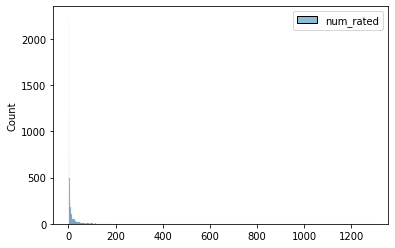

In [303]:
# want anime with most reviews; group by anime_uid
reviewed_anime = reviews.groupby(['anime_uid']).count().drop(columns=['profile']).sort_values(by=['score'],ascending=False).rename(columns={'score':'num_rated'})
sns.histplot(data=reviewed_anime)
# distribution has way too many anime with very few ratings
reviewed_anime

,num_rated
anime_uid,
11757,1292
1535,854
9253,779
32281,718
5114,637
2476,636
4181,597
4224,570
9756,565


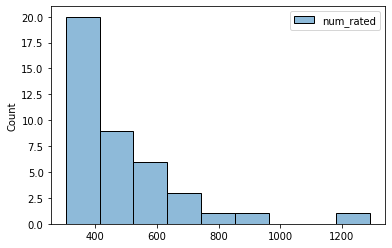

In [304]:
# take out anime with less than 20 ratings
reviewed_anime_100 = reviewed_anime[reviewed_anime.num_rated >= 300]
sns.histplot(data=reviewed_anime_100)
# 8113 -> 86 anime rated
reviewed_anime_100

In [305]:
# now, the list of anime in the first column will be the only ones we want to keep in the reviews dataset
top_1000_anime = reviewed_anime_100.index.tolist()

In [306]:
animes

,uid,title,aired,popularity,ranked,score
0,28891,Haikyuu!! Second Season,"Oct 4, 2015 to Mar 27, 2016",141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,"Oct 10, 2014 to Mar 20, 2015",28,24.0,8.83
2,34599,Made in Abyss,"Jul 7, 2017 to Sep 29, 2017",98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"Jan 6, 2017",502,22.0,8.83
...,...,...,...,...,...,...
19002,10075,Naruto x UT,"Jan 1, 2011",2382,1728.0,7.50
19003,35828,Miira no Kaikata,"Jan 12, 2018 to Mar 30, 2018",1648,1727.0,7.50
19004,10378,Shinryaku!? Ika Musume,"Sep 27, 2011 to Dec 25, 2011",1547,1548.0,7.56
19005,33082,Kingsglaive: Final Fantasy XV,"Jul 9, 2016",2154,1544.0,7.56


In [307]:
animes = animes.loc[animes['uid'].isin(top_1000_anime)]
animes

,uid,title,aired,popularity,ranked,score
2,34599,Made in Abyss,"Jul 7, 2017 to Sep 29, 2017",98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",4,1.0,9.23
14,4181,Clannad: After Story,"Oct 3, 2008 to Mar 27, 2009",64,12.0,8.97
16,30276,One Punch Man,"Oct 5, 2015 to Dec 21, 2015",5,50.0,8.68
59,269,Bleach,"Oct 5, 2004 to Mar 27, 2012",25,757.0,7.87
72,28999,Charlotte,"Jul 5, 2015 to Sep 27, 2015",66,742.0,7.88
140,22319,Tokyo Ghoul,"Jul 4, 2014 to Sep 19, 2014",6,674.0,7.93
144,20,Naruto,"Oct 3, 2002 to Feb 8, 2007",9,670.0,7.93
164,35120,Devilman: Crybaby,"Jan 5, 2018",261,650.0,7.94
425,18679,Kill la Kill,"Oct 4, 2013 to Mar 28, 2014",30,375.0,8.16


In [467]:
reviews.groupby(['profile']).count()

,anime_uid,score
profile,,
-----noname-----,2,2
---SnowFlake---,1,1
---was-----,1,1
--EYEPATCH--,1,1
--Mizu--,2,2
...,...,...
zzyamuraihazz,1,1
zzz-anime,2,2
zzzb,1,1


In [309]:
reviewers_top = reviews.groupby(['profile']).count().drop(columns=['score']).sort_values(by=['anime_uid'],ascending=False).rename(columns={'anime_uid':'num_rated'})
reviewers_top = reviewers_top[reviewers_top.num_rated >= 150]
reviewers_top

,num_rated
profile,
Sidewinder51,611
Stark700,537
ktulu007,482
LegendAqua,442
ggultra2764,355
literaturenerd,321
PyraXadon,296
BanjoTheBear,285
angelsreview,247


In [310]:
top_reviewers = reviewers_top.index.tolist()
top_reviewers

['Sidewinder51',
 'Stark700',
 'ktulu007',
 'LegendAqua',
 'ggultra2764',
 'literaturenerd',
 'PyraXadon',
 'BanjoTheBear',
 'angelsreview',
 'Karhu',
 'Eoussama',
 'BabyGirl06301',
 'Zaku88',
 'Archaeon',
 'kajia',
 'Tyrannicswine117',
 'CodeBlazeFate',
 'matthigh',
 'KANLen09']

In [311]:
reviews = reviews.loc[reviews['profile'].isin(top_reviewers)]
reviews

,profile,anime_uid,score
10,angelsreview,4672,8
31,ggultra2764,1425,7
50,BabyGirl06301,20767,7
55,Eoussama,20767,8
92,BabyGirl06301,22673,10
...,...,...,...
181191,kajia,31,9
181336,Tyrannicswine117,30736,8
181343,LegendAqua,10378,8
181459,Karhu,37109,8


In [312]:
reviews = reviews.loc[reviews['anime_uid'].isin(top_1000_anime)]
reviews

,profile,anime_uid,score
934,Karhu,269,3
1268,BabyGirl06301,28999,7
1336,Tyrannicswine117,28999,9
1409,Zaku88,28999,7
1532,ktulu007,28999,8
...,...,...,...
155841,ktulu007,8074,1
155874,literaturenerd,8074,2
177462,Zaku88,8074,7
177798,BabyGirl06301,8074,7


In [313]:
reviews_matrix = reviews.pivot(index='profile', columns='anime_uid', values='score')
reviews_matrix

anime_uid,1,20,21,30,226,269,1535,1575,1735,2001,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BabyGirl06301,NaN,10.0,NaN,NaN,9.0,9.0,9.0,NaN,10.0,NaN,...,8.0,10.0,7.0,NaN,9.0,9.0,9.0,NaN,NaN,NaN
BanjoTheBear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,3.0,7.0,8.0,NaN,NaN,9.0,NaN,NaN
CodeBlazeFate,9.0,NaN,NaN,9.0,NaN,NaN,7.0,9.0,NaN,9.0,...,NaN,NaN,NaN,NaN,3.0,4.0,6.0,NaN,NaN,2.0
Eoussama,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,8.0,NaN,8.0,NaN
Karhu,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,10.0
LegendAqua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,10.0,8.0,NaN,NaN,8.0
PyraXadon,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,9.0,6.0,7.0,6.0,NaN,7.0,NaN,NaN,NaN
Stark700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,9.0,5.0,8.0,8.0,NaN,8.0,9.0,NaN,5.0


In [314]:
reviews_matrix = reviews_matrix.fillna(0)
reviews_matrix

anime_uid,1,20,21,30,226,269,1535,1575,1735,2001,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BabyGirl06301,0.0,10.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0,0.0,...,8.0,10.0,7.0,0.0,9.0,9.0,9.0,0.0,0.0,0.0
BanjoTheBear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,3.0,7.0,8.0,0.0,0.0,9.0,0.0,0.0
CodeBlazeFate,9.0,0.0,0.0,9.0,0.0,0.0,7.0,9.0,0.0,9.0,...,0.0,0.0,0.0,0.0,3.0,4.0,6.0,0.0,0.0,2.0
Eoussama,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0
Karhu,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,10.0
LegendAqua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,10.0,8.0,0.0,0.0,8.0
PyraXadon,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,9.0,6.0,7.0,6.0,0.0,7.0,0.0,0.0,0.0
Stark700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,9.0,5.0,8.0,8.0,0.0,8.0,9.0,0.0,5.0


In [315]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

In [316]:
reviews_numpy_array = reviews_matrix.to_numpy()
reviews_numpy_array

array([[ 0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  9.,  0.,  0.,  8.,  8.,  8.,  0.,  6.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0., 10.,  0.,  0.,  9.,  9.,  9.,  0., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 10.,  7.,  7.,  8.,  0.,  0.,  7.,  0., 10.,  8.,
         9.,  0.,  0.,  7.,  0.,  8., 10.,  7.,  0.,  9.,  9.,  9.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,
         0.,  0.,  0.,  0.,  4.,  6.,  6.,  3.,  7.,  8.,  0.,  0.,  9.,
         0.,  0.],
       [ 9.,  0.,  0.,  9.,  0.,  0.,  7.,  9.,  0.,  9.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         8.,  0.,  0.,  6.,  4.,  0.,  0.,  0.,  0.,  3.,  4.,  6.,  0.,
         0.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  8.,  0.,  0., 

In [317]:
R = reviews_numpy_array

N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)

In [318]:
nP

array([[ 0.70307756,  3.45960181],
       [ 2.49881959,  2.84191606],
       [ 3.5721853 ,  1.15417532],
       [ 1.7635789 ,  1.87801461],
       [ 1.7831278 ,  2.85236062],
       [ 2.73669047, -0.679987  ],
       [ 3.19188703,  2.73330476],
       [ 3.32539358,  1.80255745],
       [ 2.25053523,  2.5316663 ],
       [ 2.29013881,  3.12141635],
       [ 2.62714352,  2.47830251],
       [ 2.17428759,  2.64216036],
       [ 2.48072004,  1.98197159],
       [ 0.96024182,  2.69907331],
       [-0.94160109,  4.15159336],
       [ 2.38908787,  1.51061824]])

In [319]:
nQ

array([[ 2.03887224,  2.80193389],
       [ 0.87953459,  2.31325923],
       [ 1.19310459,  1.40583363],
       [ 2.66079434,  1.01544908],
       [ 2.75942541,  0.71678991],
       [ 1.52038189,  1.84048579],
       [ 0.51006484,  2.98107289],
       [ 2.4366324 ,  2.47528118],
       [ 1.08329432,  2.47104526],
       [ 2.78923803,  2.05372746],
       [ 3.31276544,  0.23203171],
       [ 2.61262875,  2.01783941],
       [ 0.30565509,  0.56540306],
       [ 2.13673441,  1.43649144],
       [ 0.87167209,  1.39714085],
       [ 1.75002719,  1.16660915],
       [ 1.21289569,  2.26213213],
       [ 1.34580202,  1.87582624],
       [ 1.60750453,  0.81694391],
       [ 1.03076603,  1.97362875],
       [ 1.14545955,  2.26817608],
       [ 1.50935143,  1.94174526],
       [ 0.16185693,  2.53397425],
       [ 0.87964306,  1.50818881],
       [ 0.79193347,  2.39587105],
       [ 1.60388737,  1.04491312],
       [ 1.52948992,  2.26463648],
       [ 2.2715244 ,  0.74518055],
       [ 1.78818966,

In [320]:
nR = np.dot(nP, nQ.T)
nR

array([[11.12706089,  8.62133685,  5.70246965,  5.38379426,  4.41989775,
         7.43629436, 10.67194031, 10.27662882,  9.31047259,  9.06612991,
         3.13186835,  8.81780153,  2.17096867,  6.47197839,  5.44640409,
         5.26640795,  8.67883615,  7.43581505,  3.95650099,  7.55267807,
         8.65233299,  7.77885656,  8.8803399 ,  5.83619005,  8.84555049,
         4.74264056,  8.91009051,  4.1750858 ,  5.60514467,  6.2763453 ,
         5.5752327 ,  6.55235333,  9.16078114,  7.68814453,  7.16518837,
         6.70420916, 10.04051413,  7.14904794,  7.32720008,  7.42612959,
        -1.57826235],
       [13.05763482,  8.7718868 ,  6.97661429,  9.53466607,  8.93236303,
         9.02966618,  9.74651891, 13.12324611,  9.72946026, 12.80632369,
         8.93741782, 12.26301814,  2.37060495,  9.42170188,  6.14870829,
         7.68840749,  9.45959713,  8.69385715,  6.33854982,  8.18458559,
         9.30826279,  9.28987398,  7.60579338,  6.48421532,  8.78776329,
         6.97738058, 10.25782

In [321]:
reviews_matrix

anime_uid,1,20,21,30,226,269,1535,1575,1735,2001,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BabyGirl06301,0.0,10.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0,0.0,...,8.0,10.0,7.0,0.0,9.0,9.0,9.0,0.0,0.0,0.0
BanjoTheBear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,3.0,7.0,8.0,0.0,0.0,9.0,0.0,0.0
CodeBlazeFate,9.0,0.0,0.0,9.0,0.0,0.0,7.0,9.0,0.0,9.0,...,0.0,0.0,0.0,0.0,3.0,4.0,6.0,0.0,0.0,2.0
Eoussama,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0
Karhu,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,10.0
LegendAqua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,10.0,8.0,0.0,0.0,8.0
PyraXadon,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,9.0,6.0,7.0,6.0,0.0,7.0,0.0,0.0,0.0
Stark700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,9.0,5.0,8.0,8.0,0.0,8.0,9.0,0.0,5.0


In [364]:
list2 = reviews_matrix.index.tolist()
list2

['Archaeon',
 'BabyGirl06301',
 'BanjoTheBear',
 'CodeBlazeFate',
 'Eoussama',
 'Karhu',
 'LegendAqua',
 'PyraXadon',
 'Stark700',
 'Tyrannicswine117',
 'Zaku88',
 'angelsreview',
 'ggultra2764',
 'kajia',
 'ktulu007',
 'literaturenerd']

In [367]:
list1 = [x for x in range(0,16)]

In [381]:
new_reviews_matrix = pd.DataFrame(data=nR)
new_reviews_matrix = new_reviews_matrix.rename(index=dict(zip(list1,list2)))
new_reviews_matrix.columns = reviews_matrix.columns.tolist()
new_reviews_matrix.index.name = 'profile'
new_reviews_matrix.columns.name = 'anime_uid'
new_reviews_matrix

anime_uid,1,20,21,30,226,269,1535,1575,1735,2001,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,11.127061,8.621337,5.702470,5.383794,4.419898,7.436294,10.671940,10.276629,9.310473,9.066130,...,6.552353,9.160781,7.688145,7.165188,6.704209,10.040514,7.149048,7.327200,7.426130,-1.578262
BabyGirl06301,13.057635,8.771887,6.976614,9.534666,8.932363,9.029666,9.746519,13.123246,9.729460,12.806324,...,7.377283,9.650895,7.167133,8.440478,8.207073,8.911704,8.685659,9.997793,8.878059,5.028863
BanjoTheBear,10.517152,5.811767,5.884569,10.676857,10.684480,7.555329,5.262727,11.561011,6.721747,12.334037,...,5.651330,6.748940,4.044363,6.828225,6.926797,4.502901,7.271801,9.356443,7.303072,10.461832
CodeBlazeFate,8.857785,5.895463,4.744310,6.599549,6.212606,6.137773,6.498038,8.945808,6.551134,8.775972,...,4.991696,6.501811,4.786010,5.727001,5.581251,5.927893,5.904128,6.839359,6.029214,3.692902
Eoussama,11.627696,8.166572,6.137402,7.640963,6.964951,7.960764,9.412606,11.405222,8.979964,10.831539,...,6.651777,8.884359,6.872156,7.507682,7.218610,8.693993,7.656258,8.533374,7.862650,2.660862
Karhu,3.674484,0.834028,2.309209,6.591278,7.064285,2.909308,-0.631201,4.985150,1.284363,6.236773,...,1.697039,1.380222,-0.236751,2.414205,2.722184,-0.980126,2.804092,4.513498,2.696944,9.775085
LegendAqua,14.166389,9.130218,7.650827,11.268487,10.766979,9.883496,9.776250,14.543153,10.211873,14.516396,...,7.914087,10.154534,7.242773,9.166404,9.001544,8.843589,9.508289,11.248764,9.678884,7.432844
PyraXadon,11.830699,7.094581,6.501638,10.678594,10.468231,8.373450,7.069721,12.564598,8.056581,12.977276,...,6.486294,8.046971,5.317433,7.667747,7.651302,6.253845,8.057376,9.945705,8.147514,8.919724
Stark700,11.682115,7.835824,6.244226,8.558990,8.024857,8.081169,8.695001,11.750313,8.693854,11.476631,...,6.597358,8.624432,6.395567,7.551626,7.345555,7.947289,7.773338,8.957100,7.944285,4.560559


In [392]:
new_arch_reviews = new_reviews_matrix.loc[['Archaeon']]
new_arch_reviews

anime_uid,1,20,21,30,226,269,1535,1575,1735,2001,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,11.127061,8.621337,5.70247,5.383794,4.419898,7.436294,10.67194,10.276629,9.310473,9.06613,...,6.552353,9.160781,7.688145,7.165188,6.704209,10.040514,7.149048,7.3272,7.42613,-1.578262


In [386]:
arch_reviews = reviews_matrix.loc[['Archaeon']]
arch_reviews

anime_uid,1,20,21,30,226,269,1535,1575,1735,2001,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
arch_reviews.loc[:, (arch_reviews == 0).any(axis=0)]

anime_uid,1,20,21,226,269,1535,1575,1735,2001,2167,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [415]:
arch_reviews_list = arch_reviews.loc[:, (arch_reviews == 0).any(axis=0)].columns.tolist()
arch_reviews_list

[1,
 20,
 21,
 226,
 269,
 1535,
 1575,
 1735,
 2001,
 2167,
 2251,
 2476,
 4181,
 4224,
 5081,
 6746,
 8074,
 10620,
 11111,
 11757,
 13601,
 13759,
 18679,
 19815,
 22199,
 22319,
 28223,
 28999,
 30276,
 31240,
 32281,
 33352,
 34599,
 35120,
 35849]

In [425]:
new_arch_reviews = new_arch_reviews[arch_reviews_list]
new_arch_reviews

anime_uid,1,20,21,226,269,1535,1575,1735,2001,2167,...,22319,28223,28999,30276,31240,32281,33352,34599,35120,35849
profile,,,,,,,,,,,,,,,,,,,,,
Archaeon,11.127061,8.621337,5.70247,4.419898,7.436294,10.67194,10.276629,9.310473,9.06613,3.131868,...,6.552353,9.160781,7.688145,7.165188,6.704209,10.040514,7.149048,7.3272,7.42613,-1.578262


In [447]:
recommended_uid = new_arch_reviews.transpose().sort_values(by=['Archaeon'],axis=0,ascending=False).head(10)
recommended_uid

profile,Archaeon
anime_uid,
1,11.127061
1535,10.671940
1575,10.276629
32281,10.040514
1735,9.310473
28223,9.160781
2001,9.066130
13601,8.910091
10620,8.880340


In [449]:
recommended_uid_list = recommended_uid.index.tolist()
recommended_uid_list

[1, 1535, 1575, 32281, 1735, 28223, 2001, 13601, 10620, 11111]

In [455]:
animes.loc[animes['uid'] == 5114]['title'].values[0]

'Fullmetal Alchemist: Brotherhood'

In [462]:
def anime_recommender(user):
    all_predicted = new_reviews_matrix.loc[[user]]
    # all scores of anime by a user as predicted by matrix factorization, including those already rated
    all_reviewed = reviews_matrix.loc[[user]]
    not_reviewed_list = all_reviewed.loc[:, (all_reviewed == 0).any(axis=0)].columns.tolist()
    predicted_not_reviewed = all_predicted[not_reviewed_list]
    # take out anime already rated
    recommended_uid = predicted_not_reviewed.transpose().sort_values(by=[user],axis=0,ascending=False).head(10)
    recommended_uid_list = recommended_uid.index.tolist()
    recommended_anime_list = []
    for uid in recommended_uid_list:
        recommended_anime_list.append(animes.loc[animes['uid'] == uid]['title'].values[0])
    # convert to list of anime
    print(recommended_anime_list)

In [463]:
anime_recommender('Archaeon')

['Cowboy Bebop', 'Death Note', 'Code Geass: Hangyaku no Lelouch', 'Kimi no Na wa.', 'Naruto: Shippuuden', 'Death Parade', 'Tengen Toppa Gurren Lagann', 'Psycho-Pass', 'Mirai Nikki', 'Another']
